In [1]:
# Data manipulation
import pandas as pd
import numpy as np
import pickle

import warnings
warnings.filterwarnings('ignore')

from sklearn.exceptions import ConvergenceWarning
warnings.filterwarnings('ignore')
warnings.filterwarnings(action='ignore', category = DeprecationWarning)
warnings.filterwarnings(action='ignore', category = ConvergenceWarning)

# Data visualization
import seaborn as sns
import matplotlib.pyplot as plt

# Display properties
pd.set_option('display.max_columns', 150)
pd.set_option('display.max_rows', 150)

# Import required packages for pre and post processing
from sklearn.preprocessing import normalize, StandardScaler

from sklearn.linear_model import LinearRegression, LassoCV
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_squared_error as MSE

from sklearn.ensemble import RandomForestRegressor
import xgboost as xgb
from sklearn.svm import SVR 

In [2]:
with open('processed_data.pkl', 'rb') as f:
    fifa = pickle.load(f)

In [3]:
with open('predictors_processed.pkl', 'rb') as f:
    predictors_df = pickle.load(f)

In [4]:
# Changing the categorical variables to dtype 'categorical'.
predictors_df[['Preferred Foot','International Reputation','Weak Foot','Skill Moves','Real Face']]=predictors_df[['Preferred Foot',
                                                                                                                  'International Reputation','Weak Foot','Skill Moves',
                                                                                                                  'Real Face']].astype('category')

In [5]:
predictors_df[list(predictors_df.loc[:,'Body Type':'Position_Group_Midfielder'])]=predictors_df[list(predictors_df.loc[:,'Body Type':'Position_Group_Midfielder'])].astype('category')

In [6]:
# Target variable
target_val = fifa.Value

In [8]:
# Multiple linear regression 
# with sklearn
lre = LinearRegression()
lre.fit(predictors_df, target_val)

print('Intercept: \n', lre.intercept_)
print('Coefficients: \n', lre.coef_)

Intercept: 
 -29010030.781769447
Coefficients: 
 [-3.43588155e+05  2.64938031e+05  7.97176284e+04 -4.18433214e+04
 -3.15578089e+04  3.41878661e+06  7.19945080e+04  1.31171841e+05
  1.02090306e+06 -1.02788203e+04  1.66459459e+02  3.51005421e+04
  2.64904336e+05 -6.30538331e+03  1.41136677e+03 -1.56508803e+04
 -1.56508803e+04 -1.56508803e+04  1.76258256e+04  3.29623789e+04
  3.29623789e+04  3.29623789e+04  1.76258256e+04 -3.85266782e+04
 -3.85266782e+04 -3.85266782e+04  2.82350707e+04 -4.28005793e+03
 -4.28005793e+03 -4.28005793e+03  2.82350707e+04 -1.10311476e+04
 -1.24564020e+04 -1.24564020e+04 -1.24564020e+04 -1.10311476e+04
 -1.77253459e+04 -3.10180076e+04 -3.10180076e+04 -3.10180076e+04
 -1.77253459e+04  2.51678715e+04  5.20037160e+04  4.22552604e+04
  3.68647574e+04  3.68231818e+04  1.62762147e+04  2.82931509e+04
  5.40115647e+04  4.57309869e+04  2.28865294e+04  3.55521827e+04
  2.98752830e+04  2.79877109e+04  7.09115087e+04  3.83793475e+04
  1.92185931e+04  3.19326484e+04  5.81887

In [9]:
# Splitting our data into training and validation sets
train_predictors_val, test_predictors_val, train_target_val, test_target_val = train_test_split(predictors_df,
                                                                                                target_val,
                                                                                                test_size=0.2)

### Team 1: Soung, Alexia and Boris --> Try Lasso and XGB 

### Team 2: Harish and Ben --> Try Random forest and Support vector regressor

### Let's try out some models without hyper-parameter tuning

In [10]:
scaler = StandardScaler()
train_predictors_val[train_predictors_val.select_dtypes(include=['float64','float32','int64','int32'], exclude=['category']).columns] = scaler.fit_transform(train_predictors_val.select_dtypes(include=['float64','float32','int64','int32'], exclude=['category']))

test_predictors_val[test_predictors_val.select_dtypes(include=['float64','float32','int64','int32'], exclude=['category']).columns] = scaler.fit_transform(test_predictors_val.select_dtypes(include=['float64','float32','int64','int32'],exclude=['category']))

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:645: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\base.py:464: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:645: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\base.py:464: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)


In [11]:
train_predictors_val[train_predictors_val.select_dtypes(include='category').columns]=train_predictors_val[train_predictors_val.select_dtypes(include='category').columns].astype('int')
test_predictors_val[test_predictors_val.select_dtypes(include='category').columns]=test_predictors_val[test_predictors_val.select_dtypes(include='category').columns].astype('int')

Now that all numerical non-categorical data are scaled and categorical data are converted to integer (the models do not take dtype categorical as input) we proceed with fitting our baseline models.

In [36]:
rfr=RandomForestRegressor()
xbr=xgb.XGBRegressor()
lasso=LassoCV()
svr=SVR()

models = [rfr,xbr,lasso,svr]

for mod in models:
    mod.fit(train_predictors_val, train_target_val)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:2053: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma e

In [38]:
test_error = []

# Sequentially fit all models and calculate test score
for mod in models:
    y_pred = mod.predict(test_predictors_val)
    mse_mod = MSE(test_target_val, y_pred)
    rmse_mod = round(mse_mod**(1/2))
    test_error.append(rmse_mod)

In [41]:
cv_error=[]

for mod in models:
    MSE_cv_error = -cross_val_score(mod, train_predictors_val,
                                    train_target_val, scoring='neg_mean_squared_error', n_jobs=-1)
    RMSE_cv = round((MSE_cv_error.mean())**(1/2))
    cv_error.append(RMSE_cv)

In [39]:
train_error=[]

# Sequentially fit all models and calculate train score
for mod in models:
    y_pred = mod.predict(train_predictors_val)
    mse_mod = MSE(train_target_val, y_pred)
    rmse_mod = round(mse_mod**(1/2))
    train_error.append(rmse_mod)

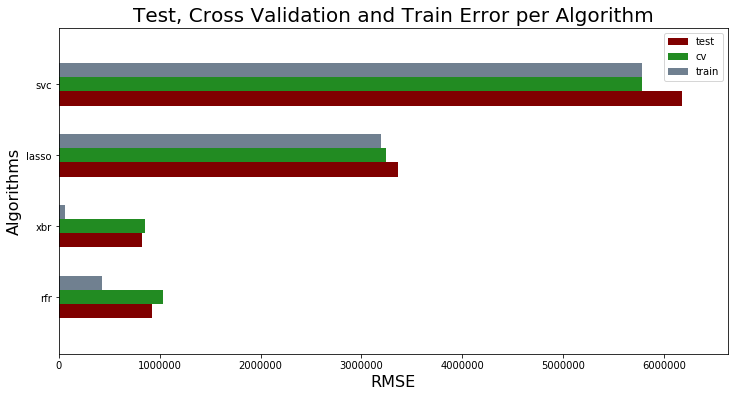

In [42]:
model_names = ['rfr','xbr','lasso','svc']

error = pd.DataFrame(dict(graph=model_names,test_error=test_error, cv_error=cv_error, train_error=train_error)) 

ind = np.arange(len(error))
width = 0.2

fig, ax = plt.subplots(figsize=(12,6))
ax.barh(ind, error.test_error, width, color='maroon', label='test')
ax.barh(ind + width, error.cv_error, width, color='forestgreen', label='cv')
ax.barh(ind + 2*width, error.train_error, width, color='slategrey', label='train')
ax.set_xlim(0, max(error.cv_error)+min(error.cv_error))
plt.xlabel('RMSE', fontsize=16)
plt.ylabel('Algorithms', fontsize=16)
plt.title('Test, Cross Validation and Train Error per Algorithm',fontsize=20)

ax.set(yticks=ind + width, yticklabels=error.graph, ylim=[2*width - 1, len(error)])
ax.legend()

plt.show()

In [7]:
# Tuning the RF Classifier via RandomizedSearchCV

optimize = False

# Set optimize to True to tune the RF model
if optimize:
    

    from datetime import datetime 

    start_time = datetime.now()

    
    # Number of trees in random forest
    n_estimators = [int(x) for x in np.linspace(start = 200, stop = 10000, num = 30)]
    n_estimators.append(60)
    
    # Number of features to consider at every split
    max_features = ['auto', 'sqrt','log2']
    
    # Maximum number of levels in tree
    max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]
    max_depth.append(None)
    max_depth.append(8)
    
    # Minimum number of samples required to split a node
    min_samples_split = [2, 5, 7,10,15,20,30,50,100,200,500]
    
    # Minimum number of samples required at each leaf node
    min_samples_leaf = [1,2, 4,5,8,10,12,15,20]
    
    # Method of selecting samples for training each tree
    bootstrap = [True, False]
    
    
    # Create the parameter grid
    rf_param_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf
                    }



    # Hyper-parameter tuning using RandomizedSearchCV 
    # GridSearchCV works in the same way 
    
    rf_grid_search = RandomizedSearchCV( RandomForestRegressor(oob_score = True, bootstrap=True,
                                        random_state = 42) , 
                                       param_distributions = rf_param_grid , n_iter = 5,
                                      scoring = 'neg_mean_absolute_error' ,
                                      refit = True , cv = 5 , random_state = 42)

    rf_grid_search.fit(train_predictors_val , train_target_val)

    time_elapsed = datetime.now() - start_time 

    print(f'Time elapsed (hh:mm:ss.ms) {time_elapsed}','\n')
    print('Optimal hyperparameters found using RandomizedGridSearch:','\n \n' , rf_grid_search.best_params_,'\n')

Best alpha : 15

Try again for more precision with alphas centered around 15

Best alpha :20.25

Lasso RMSE on Training set : 3189586.365680473
Lasso R^2 score on Training set : 0.6667845668071084

Lasso RMSE on test set : 3369934.83300849
Lasso R^2 score on test set : 0.6729294063520709


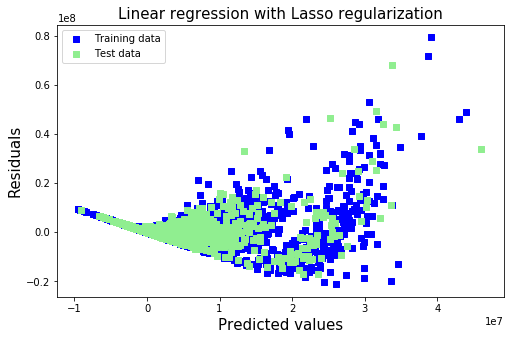

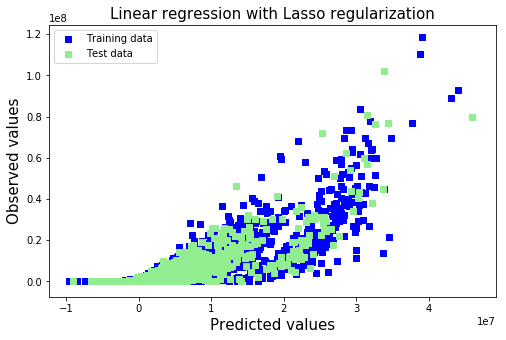

Lasso picked 117 features and eliminated the other 8 features


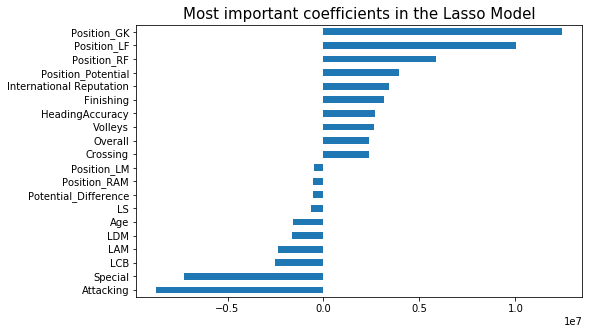

In [51]:
lasso = LassoCV(alphas = [1,5,15],
                max_iter = 50000, cv = 3 , random_state = 42)


lasso.fit(train_predictors_val , train_target_val)

alpha = lasso.alpha_

print("Best alpha :", alpha)

print(f"\nTry again for more precision with alphas centered around {alpha}")

lasso = LassoCV(alphas = [alpha * .6, alpha * .7, alpha * .8,  
                            alpha * 1.3] , 
                max_iter = 50000, cv = 3 , random_state = 42)


lasso.fit(train_predictors_val , train_target_val)

# Lasso score is the R^2 coefficient (best score is 1 and score can also take negative values)

alpha = lasso.alpha_

y_train_pred_lasso = lasso.predict(train_predictors_val)
y_test_pred_lasso = lasso.predict(test_predictors_val)

rmse_train = (MSE(train_target_val, y_train_pred_lasso))**(0.5)
rmse_test = (MSE(test_target_val, y_test_pred_lasso))**(0.5)



print(f"\nBest alpha :{alpha}")

print(f'\nLasso RMSE on Training set : {rmse_train}') 
print('Lasso R^2 score on Training set :',lasso.score(train_predictors_val ,train_target_val))

print("\nLasso RMSE on test set :", rmse_test)
print("Lasso R^2 score on test set :", lasso.score(test_predictors_val ,test_target_val))




# Plot residuals

lasso_resid_train = train_target_val - y_train_pred_lasso
lasso_resid_test = test_target_val - y_test_pred_lasso


plt.figure(figsize=(8,5))
plt.scatter(y_train_pred_lasso, lasso_resid_train, c = "blue", marker = "s", label = "Training data")
plt.scatter(y_test_pred_lasso, lasso_resid_test, c = "lightgreen", marker = "s", label = "Test data")
plt.title("Linear regression with Lasso regularization" , fontsize = 15)
plt.xlabel("Predicted values" , fontsize = 15)
plt.ylabel("Residuals" , fontsize = 15)
plt.legend(loc = "upper left")
plt.hlines(y = 0, xmin = 10.5, xmax = 13.5, color = "red")
plt.show()

# Plot predictions

plt.figure(figsize=(8,5))
plt.scatter(y_train_pred_lasso, train_target_val, c = "blue", marker = "s", label = "Training data")
plt.scatter(y_test_pred_lasso, test_target_val, c = "lightgreen", marker = "s", label = "Test data")
plt.title("Linear regression with Lasso regularization" , fontsize = 15)
plt.xlabel("Predicted values" , fontsize = 15)
plt.ylabel("Observed values" , fontsize = 15)
plt.legend(loc = "upper left")
plt.plot([10.5, 13.5], [10.5, 13.5], c = "red")
plt.show()

# Plot important coefficients

coefs = pd.Series(lasso.coef_, index = train_predictors_val.columns)

print(f"Lasso picked {sum(coefs != 0)} features and eliminated the other {sum(coefs == 0)} features")


important_coefs = pd.concat([coefs.sort_values().head(10),
                     coefs.sort_values().tail(10)])


plt.figure(figsize=(8,5))
important_coefs.plot(kind = "barh")
plt.title("Most important coefficients in the Lasso Model" , fontsize = 15)
plt.show()